In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [96]:
euro_stoxx_data = pd.read_csv(('eursotoxx.csv'),parse_dates=['Date'], index_col='Date')

In [76]:
print(euro_stoxx_data.head())

            SX5E Close Price
Date                        
2022-08-31           3517.25
2022-07-29           3708.10
2022-06-30           3454.86
2022-05-31           3789.21
2022-04-29           3802.86


In [98]:
iboxx_data = pd.read_csv(('iboxx_data.csv'),parse_dates=['Date'], index_col='Date')

In [90]:
print(iboxx_data.head())

            IBOXX Close Price data
Date                              
2022-08-31                212.1833
2022-07-29                221.5675
2022-06-30                211.5370
2022-05-31                219.3781
2022-04-29                222.2147


In [91]:
euro_stoxx_returns = euro_stoxx_data['SX5E Close Price'].pct_change()

In [92]:
print(euro_stoxx_returns.head())

df = euro_stoxx_returns
df.isnull().values.sum()

Date
2022-08-31         NaN
2022-07-29    0.054261
2022-06-30   -0.068294
2022-05-31    0.096777
2022-04-29    0.003602
Name: SX5E Close Price, dtype: float64


1

In [93]:
iboxx_returns = iboxx_data['IBOXX Close Price data'].pct_change()

In [94]:
print(iboxx_returns.head())
df2 = iboxx_returns
df2.isnull().values.sum()


Date
2022-08-31         NaN
2022-07-29    0.044227
2022-06-30   -0.045271
2022-05-31    0.037067
2022-04-29    0.012930
Name: IBOXX Close Price data, dtype: float64


1

In [103]:
import pandas as pd
import numpy as np

dates = pd.date_range("2019-09-30","2022-07-29",freq="1M")
df1 = pd.DataFrame([(dates[idx],euro_stoxx_returns) for idx,euro_stoxx_returns in enumerate(np.random.random(len(dates)))]).set_index(0)
df2 = pd.DataFrame([(dates[idx],iboxx_returns) for idx,iboxx_returns in enumerate(np.random.random(len(dates)))]).set_index(0)
Portfolios = pd.concat([df1,df2],axis=1)

print(Portfolios.head())

                   1         1
0                             
2019-09-30  0.372452  0.835302
2019-10-31  0.092659  0.632212
2019-11-30  0.219374  0.053500
2019-12-31  0.259181  0.306380
2020-01-31  0.713291  0.683416


In [106]:
Portfolios.columns=["EuroStoxx","IBoxx"]
print(Portfolios.head())

            EuroStoxx     IBoxx
0                              
2019-09-30   0.372452  0.835302
2019-10-31   0.092659  0.632212
2019-11-30   0.219374  0.053500
2019-12-31   0.259181  0.306380
2020-01-31   0.713291  0.683416


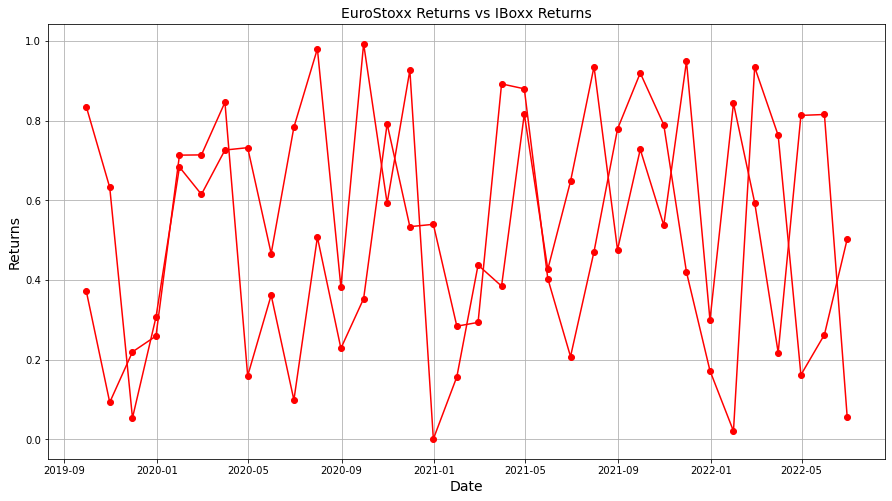

In [190]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(Portfolios,color='red', marker='o')
plt.title('EuroStoxx Returns vs IBoxx Returns', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.grid(True)
plt.show()

In [186]:
Portfolios_mean_returns = Portfolios.mean(axis=0)
print(Portfolios_mean_returns.head())

EuroStoxx    0.468986
IBoxx        0.583612
dtype: float64


In [144]:
Portfolios_std_devs = Portfolios.std()
print(Portfolios_std_devs.head())

EuroStoxx    0.279085
IBoxx        0.282722
dtype: float64


In [239]:

Portfolios_mean_retruns = pd.DataFrame([-0.468986,-0.583612])
weights=pd.DataFrame([[1,0],[0.9,0.1],[0.8,0.2],[0.7,0.3],[0.6,0.4],[0.5,0.5],[0.4,0.6],[0.3,0.7],[0.2,0.8],[0.1,0.9],[0,1]])
final= weights.dot(Portfolios_mean_retruns)
final.columns=["Portfolio Mean Returns"]
print(final)

    Portfolio Mean Returns
0                -0.468986
1                -0.480449
2                -0.491911
3                -0.503374
4                -0.514836
5                -0.526299
6                -0.537762
7                -0.549224
8                -0.560687
9                -0.572149
10               -0.583612


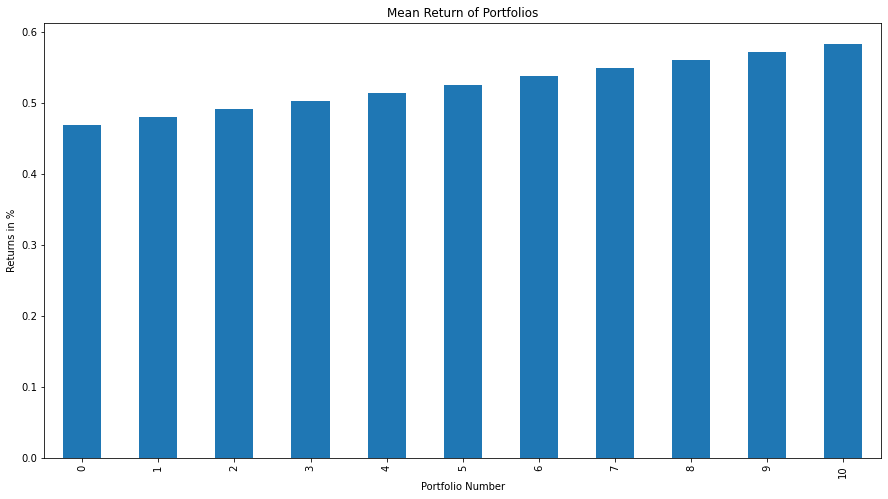

In [219]:
final.plot(kind="bar",legend=False)
plt.title("Mean Return of Portfolios")
plt.xlabel("Portfolio Number")
plt.ylabel("Returns in %")
plt.show()

In [267]:
Portfolios_std_devs = pd.DataFrame([0.279085,0.282722])
weights=pd.DataFrame([[1,0,],[0.9,0.1],[0.8,0.2],[0.7,0.3],[0.6,0.4],[0.5,0.5],[0.4,0.6],[0.3,0.7],[0.2,0.8],[0.1,0.9],[0,1]])
final2 =weights.dot(Portfolios_std_devs)
final2.columns=["Portfolio Standard Deviations"]
print(final2)

    Portfolio Standard Deviations
0                        0.279085
1                        0.279449
2                        0.279812
3                        0.280176
4                        0.280540
5                        0.280903
6                        0.281267
7                        0.281631
8                        0.281995
9                        0.282358
10                       0.282722


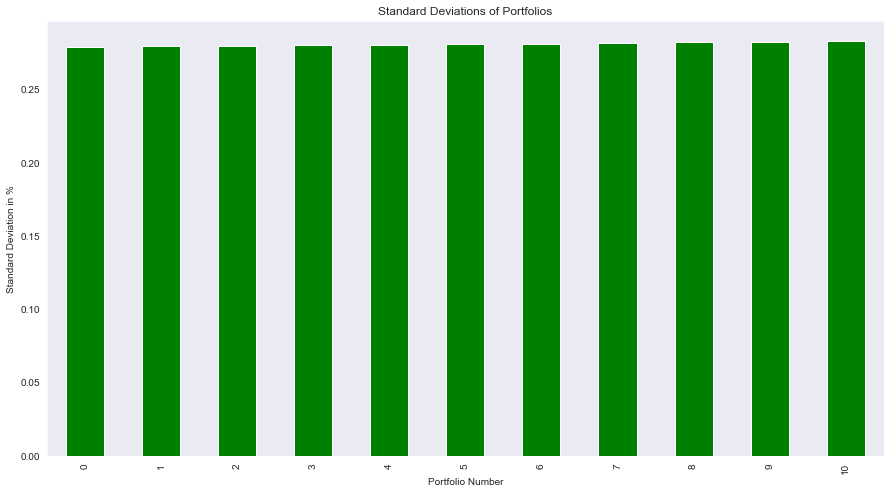

In [220]:
sns.set_style("dark")
final2.plot(kind='bar',color='green', legend=False)
plt.title("Standard Deviations of Portfolios")
plt.xlabel("Portfolio Number")
plt.ylabel("Standard Deviation in %")
plt.show()

In [222]:
Bubill_3m_data = pd.read_csv(('bubill3mbond.csv'),parse_dates=['Date'], index_col='Date')
print(Bubill_3m_data.head())

            BUBILL Close Rate
Date                         
2022-08-31              0.032
2022-07-29             -0.060
2022-06-30             -0.499
2022-05-31             -0.639
2022-04-29             -0.721


In [226]:
Risk_free_rate = Bubill_3m_data.mean()
print(Risk_free_rate)

BUBILL Close Rate   -0.639278
dtype: float64


In [273]:
Excess_returns = final.subtract(Risk_free_rate.loc['BUBILL Close Rate'])
Excess_returns.columns=['Excess Returns']
print(Excess_returns)

    Excess Returns
0         0.170292
1         0.158829
2         0.147367
3         0.135904
4         0.124441
5         0.112979
6         0.101516
7         0.090054
8         0.078591
9         0.067128
10        0.055666


In [274]:
Sharpe_Ratios = Excess_returns / final2
print(Sharpe_Ratios)

    Excess Returns  Portfolio Standard Deviations
0              NaN                            NaN
1              NaN                            NaN
2              NaN                            NaN
3              NaN                            NaN
4              NaN                            NaN
5              NaN                            NaN
6              NaN                            NaN
7              NaN                            NaN
8              NaN                            NaN
9              NaN                            NaN
10             NaN                            NaN
